 # 이미지 인식 - CNN

## NMIST 사례

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [7]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape = (28,28,1), activation = 'relu'),
    Conv2D(64, (3,3), activation= 'relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [9]:
#모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [10]:
modelpath = MODEL_DIR +"mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [11]:
#모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
                    batch_size=200, #epochs=5, verbose=2,
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
59800/60000 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.9185
Epoch 00001: val_loss improved from inf to 0.05459, saving model to ./model/mnist-cnn-01-0.0546.hdf5
60000/60000 [==============================] - 44s 732us/sample - loss: 0.2699 - accuracy: 0.9187 - val_loss: 0.0546 - val_accuracy: 0.9814
Epoch 2/30
59800/60000 [============================>.] - ETA: 0s - loss: 0.0875 - accuracy: 0.9735
Epoch 00002: val_loss improved from 0.05459 to 0.04425, saving model to ./model/mnist-cnn-02-0.0442.hdf5
60000/60000 [==============================] - 44s 727us/sample - loss: 0.0875 - accuracy: 0.9735 - val_loss: 0.0442 - val_accuracy: 0.9840
Epoch 3/30
59800/60000 [============================>.] - ETA: 0s - loss: 0.0665 - accuracy: 0.9801
Epoch 00003: val_loss improved from 0.04425 to 0.03643, saving model to ./model/mnist-cnn-03-0.0364.hdf5
60000/60000 [==============================] - 44s 727us/sa

In [23]:
from tensorflow.keras.models import load_model
del model
model = load_model('./model/mnist-cnn-10-0.0272.hdf5')

In [24]:
#테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=0)[1]))


 Test Accuracy: 0.9915


In [17]:
#테스트셋의 오차
y_vloss = history.history['val_loss']

#학습셋의 오차
y_loss = history.history['loss']

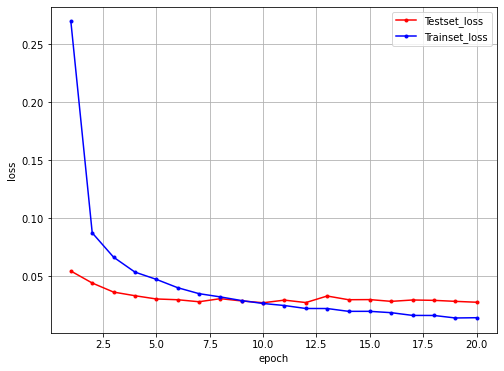

In [18]:
#그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##### 결론: Best Model은 Epoch 18, 정확도는 99.15%